In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
from utils import COLORS, color_coding

In [4]:
GRAPH_PATH_YO = './graphs/graph_2.graphml'
GRAPH_PATH_OTRO = './graphs/graph_3.graphml'
SOCIODEMOGRAPHIC_PATH = "./data/Sociodemographic_survey/answers_sociodemographic_survey.pkl"

In [26]:
G_yo = nx.read_graphml(GRAPH_PATH_YO)
G_otro = nx.read_graphml(GRAPH_PATH_OTRO)

## Graph Visualization

### Graph for "yo" answers

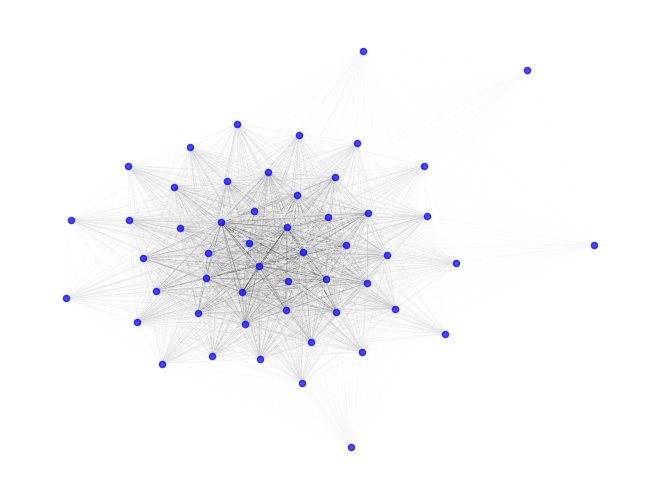

In [27]:
cmap = plt.cm.Greys # edge colors
nx.draw(G_yo, 
        pos= nx.spring_layout(G, k=1, iterations=100), # try also nx.spectral_layout(G)
        edge_color=np.real([*nx.get_edge_attributes(G, 'weight').values()]), 
        width=0.4, 
        edge_cmap=cmap, 
        node_color="blue",# this is the point where we can later plot one group red and the other blue
        alpha=0.7,
        node_size=20, 
        with_labels = False, 
        font_weight ="bold", 
        font_color="w")

Try coloring nodes by gender

In [28]:
df_sociodem = pd.read_pickle(SOCIODEMOGRAPHIC_PATH)

In [29]:
color_map = color_coding(G_yo, df_sociodem, sociodem_entry='genere',colors_dict=COLORS)
# color_map

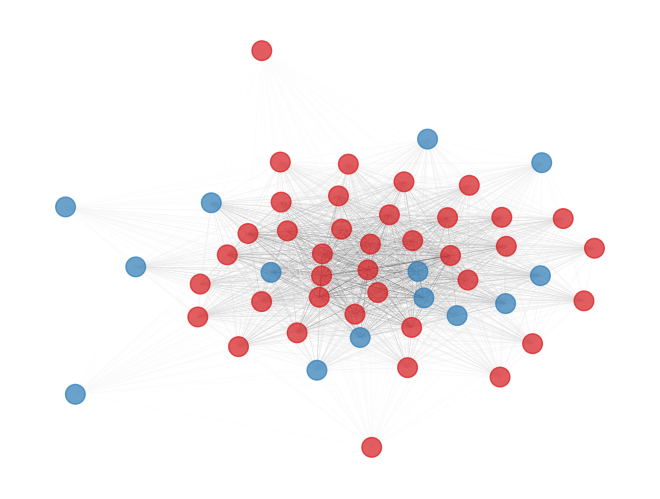

In [30]:
cmap = plt.cm.Greys 
nx.draw(G_yo, 
        pos= nx.spring_layout(G, k=1, iterations=500),
        font_color="w",
        edge_color=np.real([*nx.get_edge_attributes(G, 'weight').values()]), 
        width=0.3, 
        edge_cmap=cmap, 
        node_color=color_map, 
        alpha=0.7,
        node_size=200, 
        with_labels = False, 
        font_weight ="bold") 

### Graph for "otro" answers

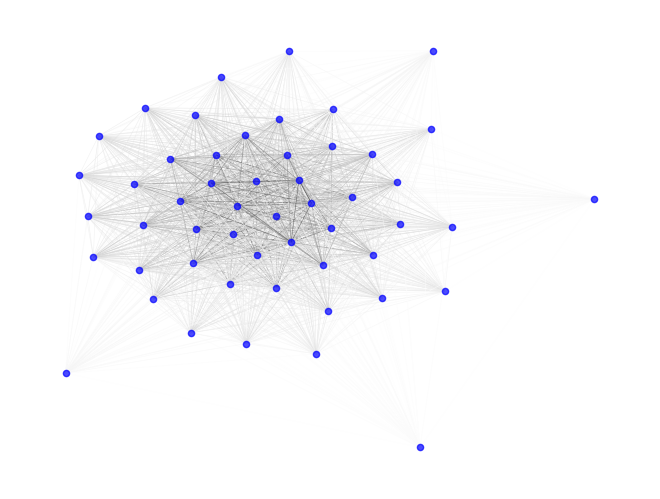

In [31]:
cmap = plt.cm.Greys # edge colors
nx.draw(G_otro, 
        pos= nx.spring_layout(G, k=1, iterations=100), # try also nx.spectral_layout(G)
        edge_color=np.real([*nx.get_edge_attributes(G, 'weight').values()]), 
        width=0.4, 
        edge_cmap=cmap, 
        node_color="blue",# this is the point where we can later plot one group red and the other blue
        alpha=0.7,
        node_size=20, 
        with_labels = False, 
        font_weight ="bold", 
        font_color="w")

In [34]:
color_map = color_coding(G_otro, df_sociodem, sociodem_entry='genere',colors_dict=COLORS)

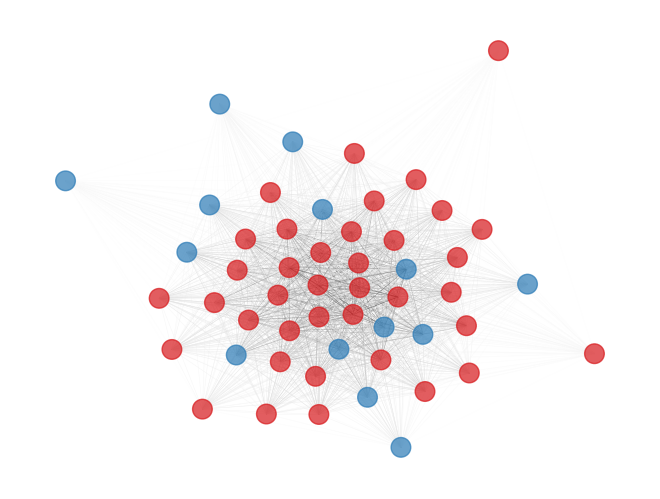

In [35]:
cmap = plt.cm.Greys 
nx.draw(G_otro, 
        pos= nx.spring_layout(G, k=1, iterations=500),
        font_color="w",
        edge_color=np.real([*nx.get_edge_attributes(G, 'weight').values()]), 
        width=0.3, 
        edge_cmap=cmap, 
        node_color=color_map, 
        alpha=0.7,
        node_size=200, 
        with_labels = False, 
        font_weight ="bold") 

## Graph analysis

### Node degrees

In [69]:
nodes_yo = G_yo.nodes()
edges_yo = G_yo.edges()
nodes_otro = G_otro.nodes()
edges_otro = G_otro.edges()
print(f'Number of nodes: {len(nodes)} \nNumber of edges: {len(edges)}')

Number of nodes: 52 
Number of edges: 1326


In [55]:
weighted_edges_yo = nx.get_edge_attributes(G_yo, 'weight')
non_zero_edges_weights = [x for x in weighted_edges_yo.values() if x != 0]
print(f'Number of non zero edges for "yo" graph: {len(non_zero_edges_weights)}')

Number of non zero edges for "yo" graph: 1326


In [56]:
weighted_edges_yo = nx.get_edge_attributes(G_otro, 'weight')
non_zero_edges_weights = [x for x in weighted_edges_yo.values() if x != 0]
print(f'Number of non zero edges for "otro" graph: {len(non_zero_edges_weights)}')

Number of non zero edges for "otro" graph: 1326


In [57]:
k_yo = [x[1] for x in G_yo.degree(weight='weight')]
k_otro = [x[1] for x in G_otro.degree(weight='weight')]
k_yo_dS = pd.Series(k_yo)
k_otro_dS = pd.Series(k_otro)

<Axes: ylabel='Frequency'>

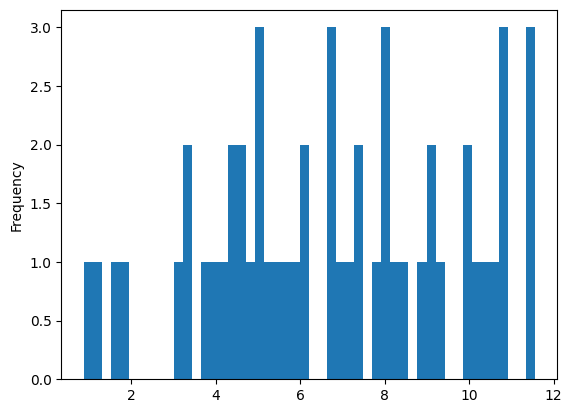

In [58]:
k_yo_dS.plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

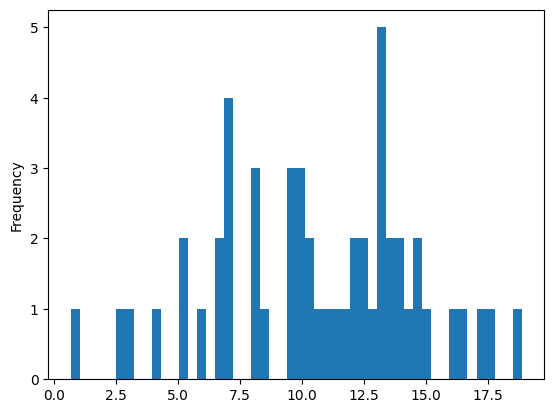

In [59]:
k_otro_dS.plot(kind='hist', bins=50)

### Quantiles computation

In [60]:
k_yo_dS_25_quantile = k_yo_dS.quantile(q=0.25)
k_yo_dS_75_quantile = k_yo_dS.quantile(q=0.75)
mean_yo = k_yo_dS.mean()

k_otro_dS_25_quantile = k_otro_dS.quantile(q=0.25)
k_otro_dS_75_quantile = k_otro_dS.quantile(q=0.75)
mean_otro = k_otro_dS.mean()

In [62]:
print(f'YO:\n\t25 quantile: {k_yo_dS_25_quantile}\n\t75 quantile {k_yo_dS_75_quantile}\n\tmean {mean_yo}')
print(f'OTRO:\n\t25 quantile: {k_otro_dS_25_quantile}\n\t75 quantile {k_otro_dS_75_quantile}\n\tmean {mean_otro}')

YO:
	25 quantile: 4.597435897435897
	75 quantile 9.081410256410255
	mean 6.754437869822484
OTRO:
	25 quantile: 7.7487179487179505
	75 quantile 13.41730769230769
	mean 10.639053254437869


Try to plot historgram + quantiles

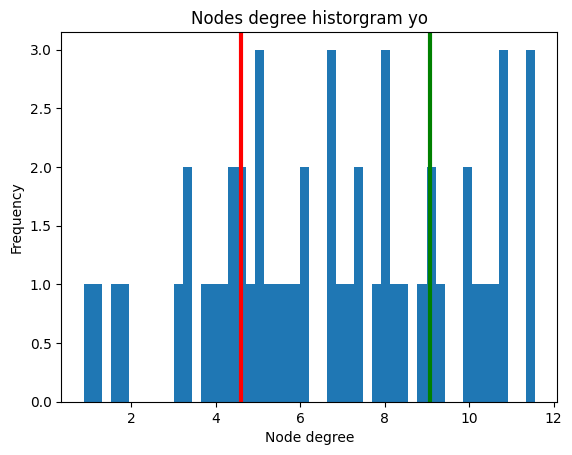

In [63]:
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.title('Nodes degree historgram yo')
_ = plt.hist(k_yo_dS, bins=50, histtype='barstacked')
plt.axvline(k_yo_dS_25_quantile, color='r', linestyle='-', linewidth=3)
plt.axvline(k_yo_dS_75_quantile, color='g', linestyle='-', linewidth=3)

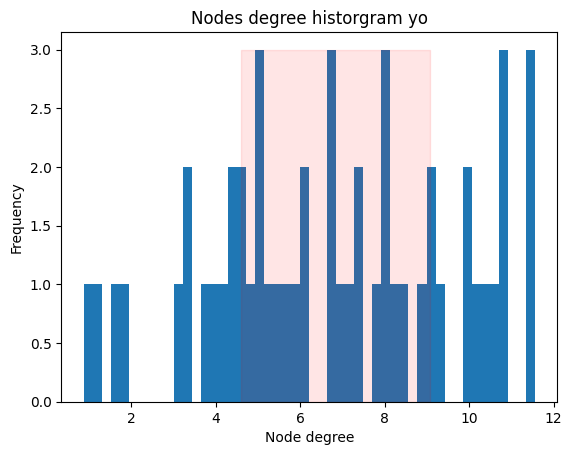

In [65]:
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.title('Nodes degree historgram yo')
_ = plt.hist(k_yo_dS, bins=50, histtype='barstacked')
plt.fill_betweenx(y=[0, 3], x1=k_yo_dS_25_quantile, x2=k_yo_dS_75_quantile, color='r', alpha=0.1)

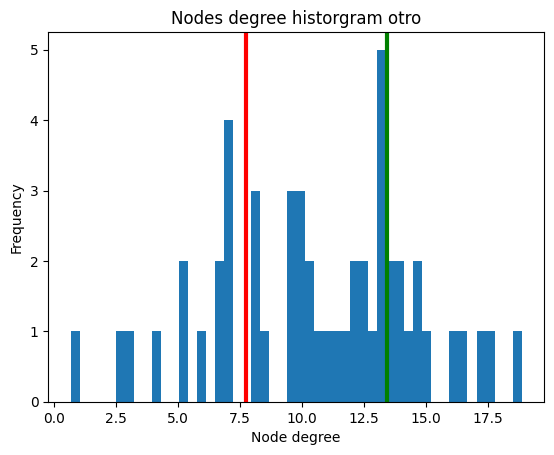

In [64]:
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.title('Nodes degree historgram otro')
_ = plt.hist(k_otro_dS, bins=50, histtype='barstacked')
plt.axvline(k_otro_dS_25_quantile, color='r', linestyle='-', linewidth=3)
plt.axvline(k_otro_dS_75_quantile, color='g', linestyle='-', linewidth=3)

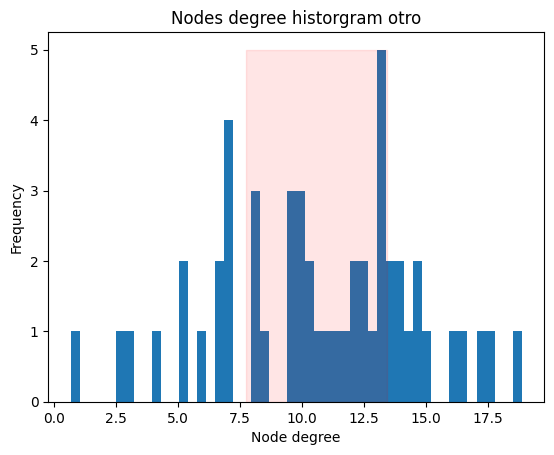

In [67]:
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.title('Nodes degree historgram otro')
_ = plt.hist(k_otro_dS, bins=50, histtype='barstacked')
plt.fill_betweenx(y=[0, 5], x1=k_otro_dS_25_quantile, x2=k_otro_dS_75_quantile, color='r', alpha=0.1)

### Edge attributes

In [68]:
edge_attr = nx.get_edge_attributes(G_yo, 'weight')
for key, item in edge_attr.items():
    print(f'{key}: {item}')
    break

('4e53c5c', 'bd4b2f4'): 0.39999999999999997


### Graph properties

#### Shortest path & Diameter

In [71]:
nodes_yo_pairs = itertools.combinations(nodes_yo, 2)
nodes_otro_pairs = itertools.combinations(nodes_otro, 2)

Shortest path with steps

In [77]:
shortest_paths_yo = [nx.shortest_path(G_yo, source=x[0], target=x[1], weight='weight') for x in nodes_yo_pairs]
shortest_paths_otro = [nx.shortest_path(G_otro, source=x[0], target=x[1], weight='weight') for x in nodes_otro_pairs]

In [80]:
shortest_paths_lenghts_yo = [len(x) for x in shortest_paths_yo]
shortest_paths_lenghts_otro = [len(x) for x in shortest_paths_otro]

In [81]:
diameter_steps_yo = max(shortest_paths_lenghts_yo) 
diameter_steps_otro = max(shortest_paths_lenghts_otro) 

In [84]:
print(f'STEPS DIAMETER:\n yo: {diameter_steps_yo}\n otro: {diameter_steps_otro}')

STEPS DIAMETER:
 yo: 4
 otro: 3
